1. ##### Biến phân loại: student_id, course_id, subjecta_id, gender
2. ##### Biến số: age, regular_grade, absent_class_periods, absenteeism_rate, midterm_grade, final_grade,overall_grade, four_point_scale

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Lấy địa chỉ thư mục chứa dữ liệu đã được reformatted
current_directory = os.getcwd()
folder_path = os.path.join(current_directory,'../../data/reformatted_data')
df = pd.read_csv(f'{folder_path}/EDA.csv')
df

,Unnamed: 0,student_id,gender,age,gpa1,gpa2,gpa3,gpa4,ar1,ar2,ar3,ar4,drop_out
0,0,1900006098,1,23,1.2,2.2,1.6,0.4,34.5,12.0,0.0,53.0,1
1,1,1900007549,0,23,1.6,1.1,2.0,3.8,100.0,48.0,76.0,90.0,1
2,2,1900007763,1,23,6.0,7.3,5.2,7.4,0.0,0.7,7.2,11.0,0
3,3,1900007784,1,23,8.2,7.6,6.5,6.6,7.7,2.2,16.1,8.9,0
4,4,1900008106,1,23,3.7,7.6,3.2,7.2,7.0,0.0,3.8,13.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,320,2200011621,1,20,3.6,2.7,9.1,4.9,12.8,40.0,4.6,19.3,0
321,321,2200011643,1,23,9.7,8.0,9.0,6.1,13.2,0.0,16.5,0.0,0
322,322,2200011704,1,20,6.9,7.3,9.7,5.7,3.8,10.0,15.5,9.1,0
323,323,2200011866,0,21,6.0,3.1,3.0,5.1,15.2,6.7,19.7,0.0,0


In [3]:
df['gender'].value_counts()

gender
1    299
0     26
Name: count, dtype: int64

## Phân tích đơn biến.

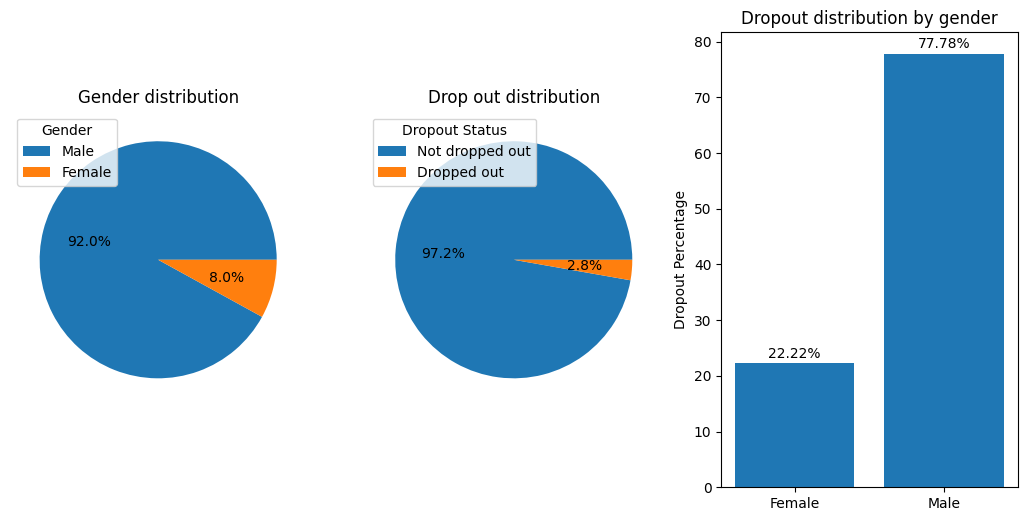

In [4]:
# Số lượng nam, nữ
gender_counts = df['gender'].value_counts(normalize=True)
# Tỉ lệ nam
male_percentage  = gender_counts[1]
female_percentage = 1 - male_percentage
fig = plt.figure(figsize=(13, 13))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)

# Tỉ lệ bị thôi học và chưa thôi học.
drop_out = df['drop_out'].value_counts(normalize=True)
drop_out0 = drop_out[0]
drop_out1 = 1 - drop_out0

# Tỉ lệ sinh viên nam nữ bị thôi học.
m_cond = (df['drop_out'] == 1) & (df['gender'] == 1)
f_cond = (df['drop_out'] == 1) & (df['gender'] == 0)


male_dropped_out_student = round((df[m_cond].shape[0] / df[df['drop_out']==1].shape[0]) * 100,2)
female_dropped_out_student = round((df[f_cond].shape[0] / df[df['drop_out']==1].shape[0]) * 100,2)





# Biểu đồ cột tỉ lệ nam nữ.
ax1.pie([male_percentage, female_percentage], labels=None, autopct='%1.1f%%')
ax2.pie([drop_out0, drop_out1], autopct='%1.1f%%', labels=None)

female_dropped_out_student

ax3.bar(['Female', 'Male'], [female_dropped_out_student, male_dropped_out_student])
for i, value in enumerate([female_dropped_out_student, male_dropped_out_student]):
    ax3.text(i, value + 1, f'{value}%', ha='center')

ax3.set_ylabel('Dropout Percentage')
ax3.set_title('Dropout distribution by gender')

ax1.set_title('Gender distribution')
ax2.set_title('Drop out distribution')
ax3.set_title('Dropout distribution by gender')

ax1.legend(['Male','Female'], title='Gender', loc='upper left')
ax2.legend(['Not dropped out','Dropped out'],title='Dropout Status', loc='upper left')




In [5]:
# Tỉ lệ sinh viên nam có sự chênh lệch lớn với tỉ lệ sinh viên nữ (92 > 8)-> đúng, vì ngành cntt không phải là sự lựa chọn phổ biến với phái nữ.
# TỈ lệ sinh viên chưa thôi học có chênh lệch lớn với tỉ lệ sinh viên bị thôi học, điều này cho thấy tình trạng học tập khả quan của các sinh viên trong tập dữ liệu.
# Tỉ lệ sinh viên nam thôi học lớn hơn nữ.

In [6]:
df['mean_gpa'] = round(df.loc[:,['gpa1', 'gpa2', 'gpa3','gpa4']].mean(axis = 1),2)
df

,Unnamed: 0,student_id,gender,age,gpa1,gpa2,gpa3,gpa4,ar1,ar2,ar3,ar4,drop_out,mean_gpa
0,0,1900006098,1,23,1.2,2.2,1.6,0.4,34.5,12.0,0.0,53.0,1,1.35
1,1,1900007549,0,23,1.6,1.1,2.0,3.8,100.0,48.0,76.0,90.0,1,2.12
2,2,1900007763,1,23,6.0,7.3,5.2,7.4,0.0,0.7,7.2,11.0,0,6.48
3,3,1900007784,1,23,8.2,7.6,6.5,6.6,7.7,2.2,16.1,8.9,0,7.22
4,4,1900008106,1,23,3.7,7.6,3.2,7.2,7.0,0.0,3.8,13.7,0,5.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,320,2200011621,1,20,3.6,2.7,9.1,4.9,12.8,40.0,4.6,19.3,0,5.08
321,321,2200011643,1,23,9.7,8.0,9.0,6.1,13.2,0.0,16.5,0.0,0,8.20
322,322,2200011704,1,20,6.9,7.3,9.7,5.7,3.8,10.0,15.5,9.1,0,7.40
323,323,2200011866,0,21,6.0,3.1,3.0,5.1,15.2,6.7,19.7,0.0,0,4.30


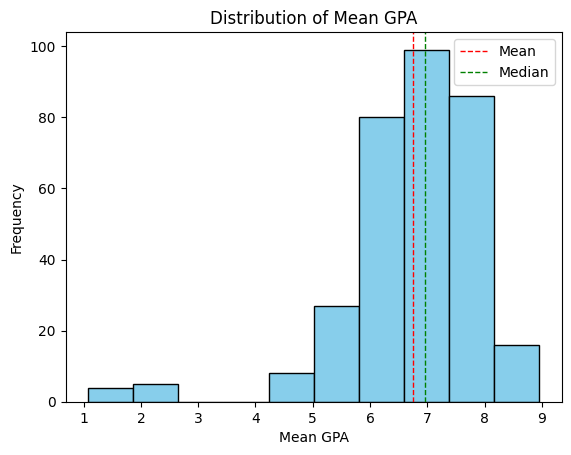

In [7]:
plt.hist(df['mean_gpa'], bins=10, color='skyblue', edgecolor='black')

# Đặt tiêu đề và nhãn cho trục x và y
plt.title('Distribution of Mean GPA')
plt.xlabel('Mean GPA')
plt.ylabel('Frequency')

# Tính mean và median
mean_value = df['mean_gpa'].mean()
median_value = df['mean_gpa'].median()

# Vẽ đường dọc cho mean và median
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1, label='Median')

# Hiển thị chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [8]:
print(df['mean_gpa'].mean())

6.745507692307692


In [9]:
print(df['mean_gpa'].median())

6.95


In [10]:
# mean < median: lệch trái => chỉ có ít sinh viên có điểm gpa thấp

In [11]:
df['mean_rate'] = df.loc[:, ['ar1','ar2','ar3','ar4']].mean(axis = 1)

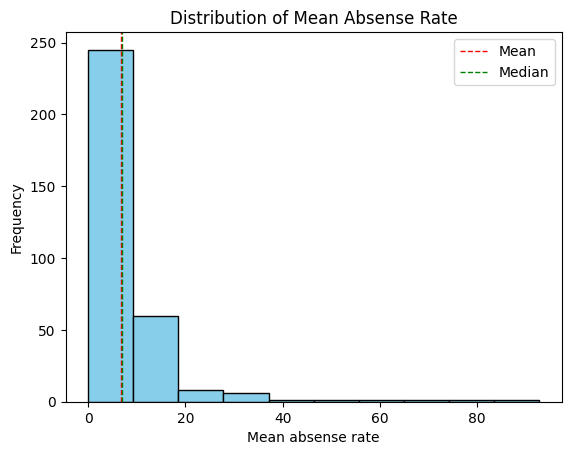

In [12]:
plt.hist(df['mean_rate'], bins=10, color='skyblue', edgecolor='black')

# Đặt tiêu đề và nhãn cho trục x và y
plt.title('Distribution of Mean Absense Rate')
plt.xlabel('Mean absense rate')
plt.ylabel('Frequency')

# Tính mean và median
mean_value = df['mean_gpa'].mean()
median_value = df['mean_gpa'].median()

# Vẽ đường dọc cho mean và median
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1, label='Median')

# Hiển thị chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [13]:
print(df['mean_rate'].mean())
print(df['mean_rate'].median())

8.334371794871794
6.125


In [14]:
# Biểu đồ lệch phải, -> chỉ có 1 số ít sinh viên nghỉ quá nhiều.